In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('E:\DATASETS\diabetes.csv')

In [3]:
cols=list(df.columns)
cols

['preg',
 'glucose',
 'bp_diastolic',
 'skin_triceps',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
feature_cols=cols[0:8]
feature_cols

['preg',
 'glucose',
 'bp_diastolic',
 'skin_triceps',
 'insulin',
 'bmi',
 'pedigree',
 'age']

In [7]:
# Dataframe
X = df[feature_cols] #Feature
# series
y = df.label         #TragetVariable
X_train,X_test,y_train,y_test, = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [8]:
X_train.shape

(537, 8)

In [12]:
#GET TOTAL NUMBER OF 0 IN THE ACTUAL DATA SET
count0 = df['label'][df['label']==0].count()
count0

500

In [13]:
len(y_train)

537

In [14]:
# get %age of 0 in the training dataset
len(y_train[y_train==0])*100/count0

70.8

In [17]:
# get number of 0 in the training dataset
len(y_train[y_train==0])

354

In [15]:
len(y_test)

231

In [18]:
len(y_test[y_test==0])

146

In [16]:
len(y_test[y_test==0])*100/count0

29.2

In [9]:
len(y_train)

537

In [10]:
X_test.shape

(231, 8)

In [20]:
#Create Decision Tree Classifier Object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [21]:
#Train Classifier
clf=clf.fit(X_train,y_train)

In [22]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [23]:
#predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
len(y_pred)

231

[Text(334.8, 570.7800000000001, 'X[1] <= 127.5\nentropy = 0.926\nsamples = 537\nvalue = [354, 183]'),
 Text(167.4, 407.70000000000005, 'X[5] <= 26.45\nentropy = 0.72\nsamples = 342\nvalue = [274, 68]'),
 Text(83.7, 244.62, 'X[5] <= 9.1\nentropy = 0.201\nsamples = 96\nvalue = [93, 3]'),
 Text(41.85, 81.53999999999996, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(125.55000000000001, 81.53999999999996, 'entropy = 0.088\nsamples = 90\nvalue = [89, 1]'),
 Text(251.10000000000002, 244.62, 'X[7] <= 27.5\nentropy = 0.833\nsamples = 246\nvalue = [181, 65]'),
 Text(209.25, 81.53999999999996, 'entropy = 0.544\nsamples = 112\nvalue = [98, 14]'),
 Text(292.95, 81.53999999999996, 'entropy = 0.958\nsamples = 134\nvalue = [83, 51]'),
 Text(502.20000000000005, 407.70000000000005, 'X[5] <= 28.15\nentropy = 0.977\nsamples = 195\nvalue = [80, 115]'),
 Text(418.5, 244.62, 'X[1] <= 145.5\nentropy = 0.82\nsamples = 43\nvalue = [32, 11]'),
 Text(376.65000000000003, 81.53999999999996, 'entropy = 0.40

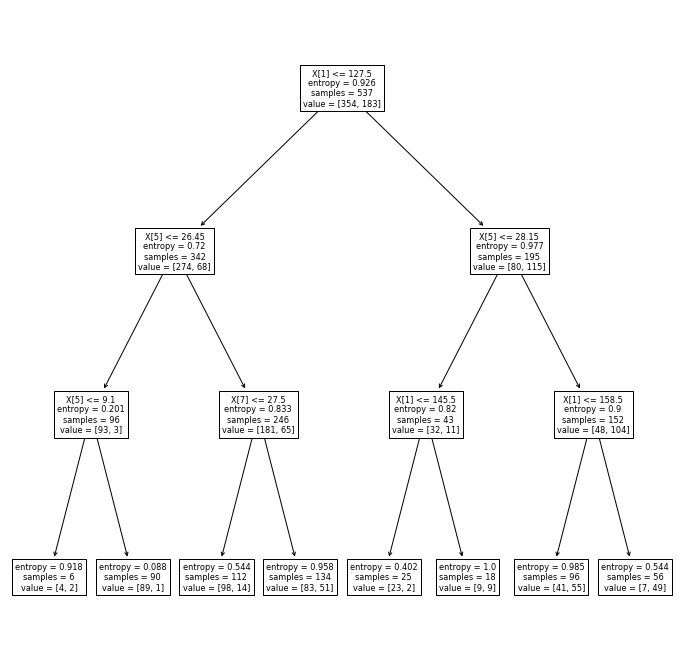

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(clf)

In [26]:
#calculate accuracy
from sklearn import metrics

In [27]:
result=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)

Confusion Matrix
[[124  22]
 [ 31  54]]


In [28]:
def plt1():
    import seaborn as sns;sns.set()
    c_mtrx=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['predicted'])
    sns.heatmap(c_mtrx,annot=True, fmt = '.3g')

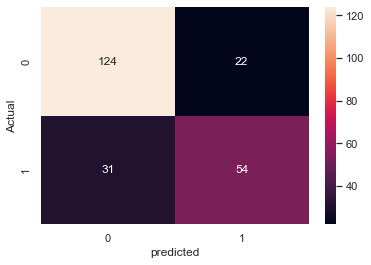

In [29]:
plt1()

In [22]:
# [row, column]
# (Actual, Predict)
TP = result[1, 1]   # Predicted +ve and Actual +ve   
TN = result[0, 0]   # Predicted -ve and Actual -ve   
FP = result[0, 1]   # Predicted +ve and Actual -ve
FN = result[1, 0]   # Predicted -ve and Actual +ve

## Metrics computed from a confusion matrix

Classification Accuracy :Overall , how often is the classifer correct (TP+TN)/(TP+TN+FP+FN)

Sensititity (Recall ):When the actual value is positive ,how often is the prediction 

In [23]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))


In [24]:
EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy:	 0.7705627705627706
Sensitivity:	 0.6352941176470588
Specificity:	 0.8493150684931506
Precision:	 0.7105263157894737
Classification Eerror: 0.22943722943722944
False_Positive_Rate: 0.15068493150684936


### sensitivity and specificity are row wise
### Precision and False Positive rate are column wise
### Classification error = 1-Classification Accuracy

In [30]:
y = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})
y.head()

,Original,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0


In [31]:
y.tail()

,Original,Predicted
241,0,0
599,0,0
650,0,0
11,1,1
214,1,0


In [32]:
y.sample(10)

,Original,Predicted
358,0,0
353,0,0
629,0,0
408,1,0
459,0,0
697,0,0
154,1,1
268,0,0
631,0,0
699,0,0
